# PES_1D-Discriminator

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from pes_1D.data_generator import generate_discriminator_training_set  # type: ignore
from pes_1D.discriminator import NaiveDiscriminator  # type: ignore
from pes_1D.training import test_model, train_model  # type: ignore
from pes_1D.utils import get_model_failure_info  # type: ignore
from pes_1D.visualization import sample_visualization  # type: ignore

### parameters

In [7]:
in_features = 64
n_samples = 6000
test_split = 0.5
gpu = True

### Generate training and test sets 

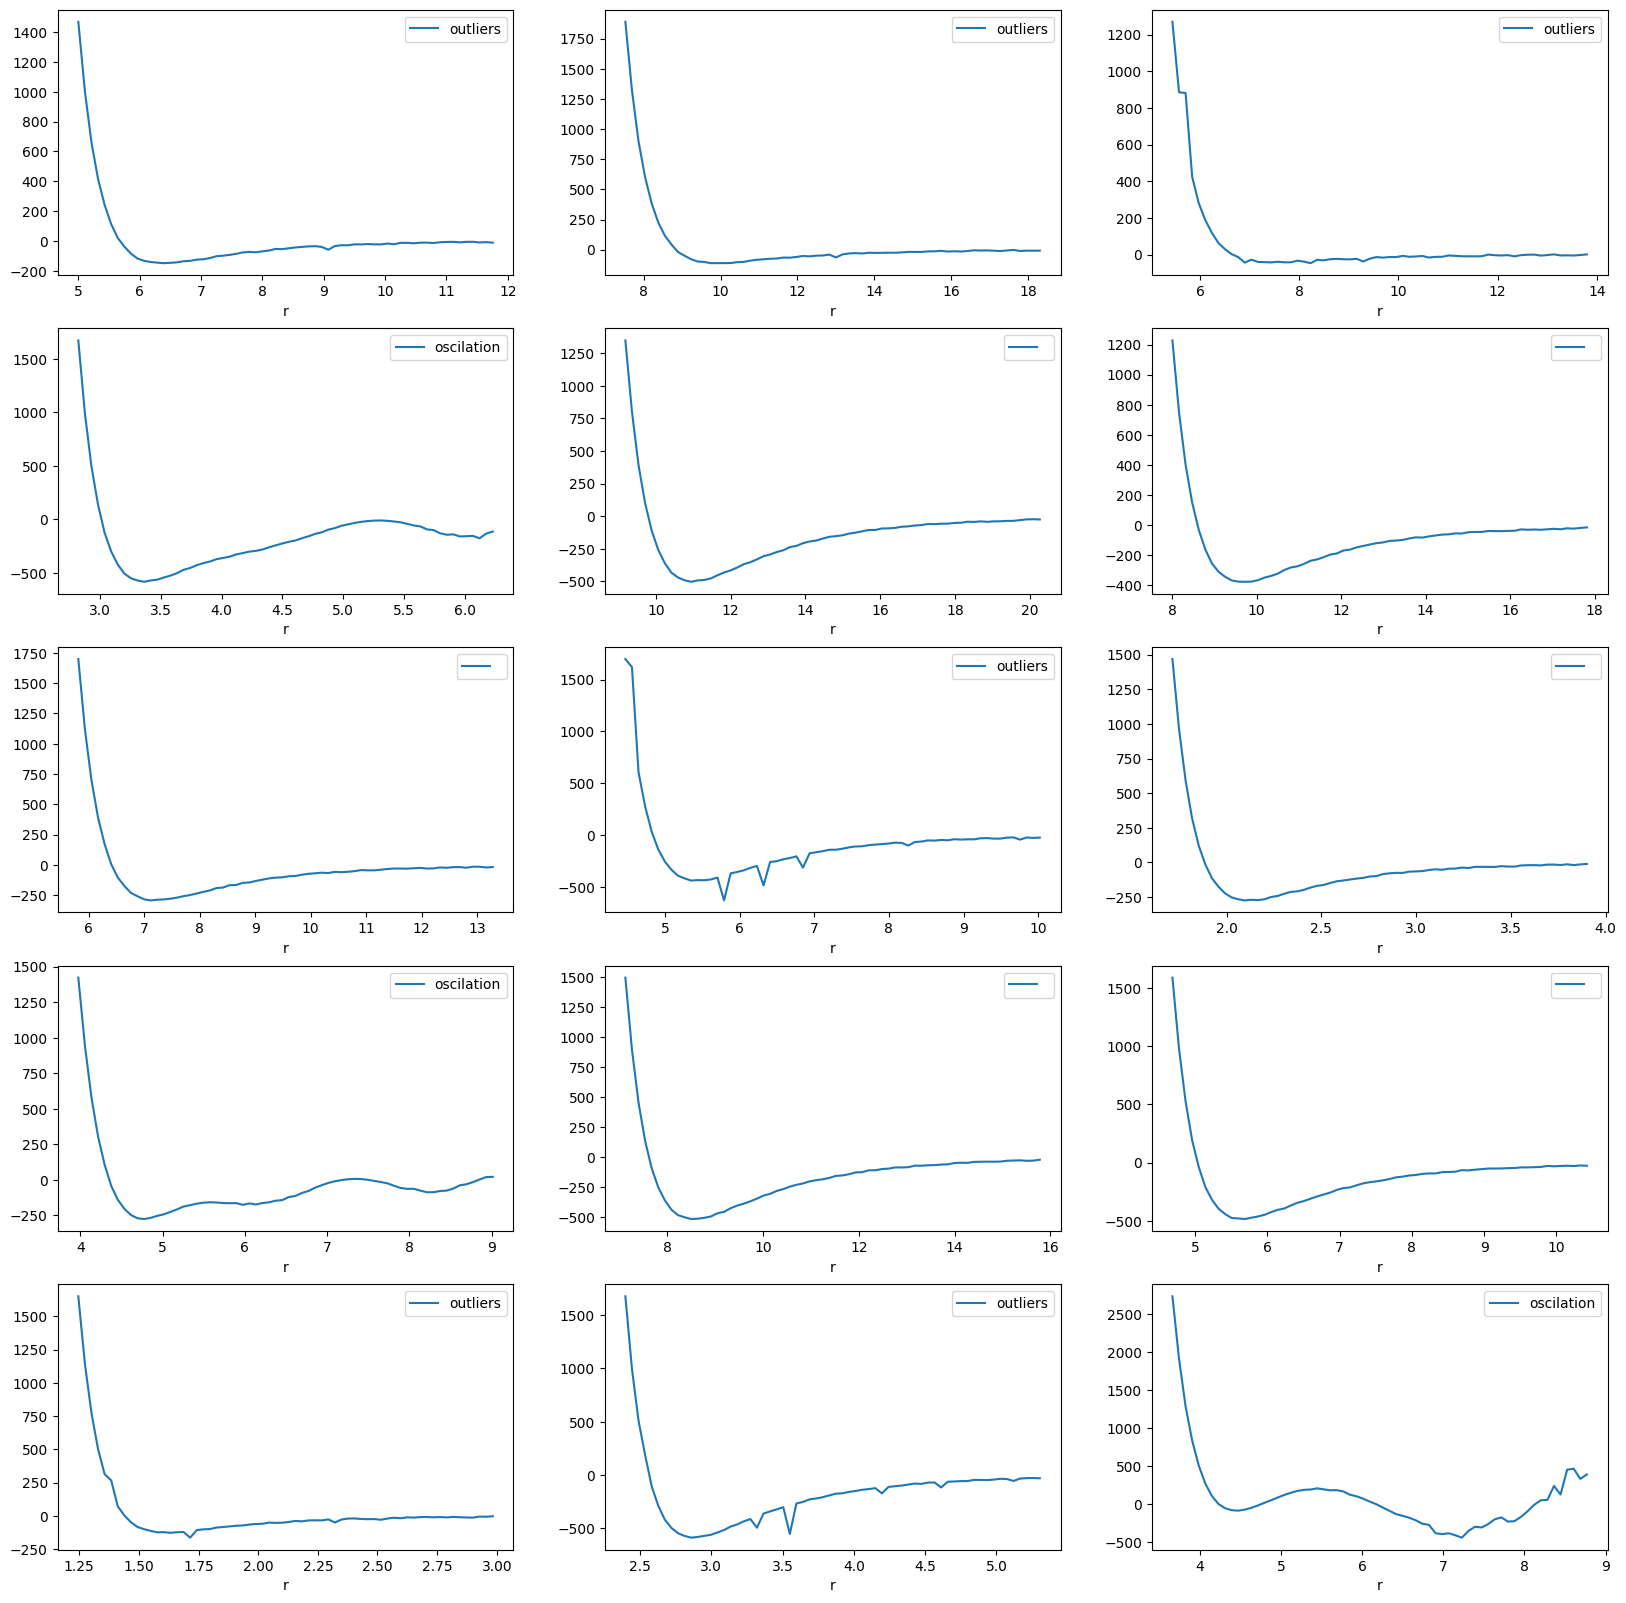

In [8]:
X_train, y_train, X_test, y_test, df_samples = generate_discriminator_training_set(
    n_samples, in_features, test_split, gpu, generator_seed=[36, 25]
)

sample_visualization(df_samples)

### Discriminator model definition

In [4]:
model = NaiveDiscriminator(in_features, 512, 128, 64, 2)
model = model.to("cuda" if gpu else "cpu")  # x = self.dropout(x)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

### Train the model

Training the model...
Training Losses:0.022311726585030556


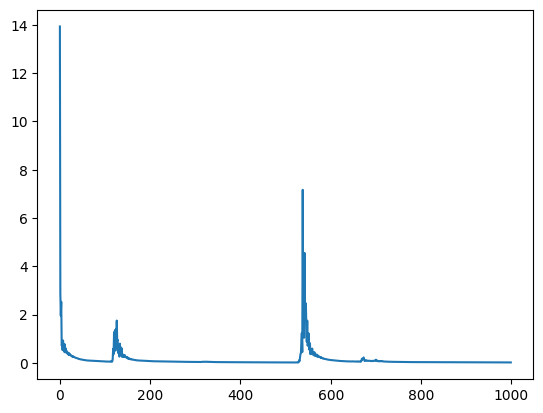

Evaluation:
Test Loss: 0.0645393654704094
Accuracy (%):  98.33333333333333


In [5]:
epochs = 1000

# Train the model
print("Training the model...")
losses = train_model(X_train, y_train, model, criterion, optimizer, epochs)

print(f"Training Losses:{losses[-1]}")
plt.plot(range(epochs), losses)
plt.show()

# Test the model
test_loss, accuracy = test_model(X_test, y_test, model, criterion)

### Get model failure information

Confusion Matrix:  Confusion Matrix
[[1460   50]
 [   0 1490]]


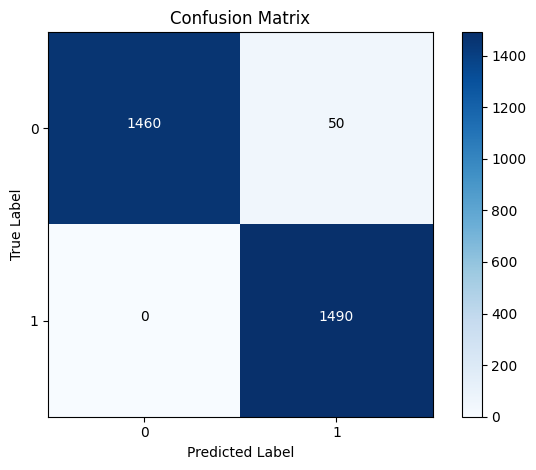



Failure Distribution by Deformation Type:
deformation_type
oscilation    30
outliers      20
Name: count, dtype: int64




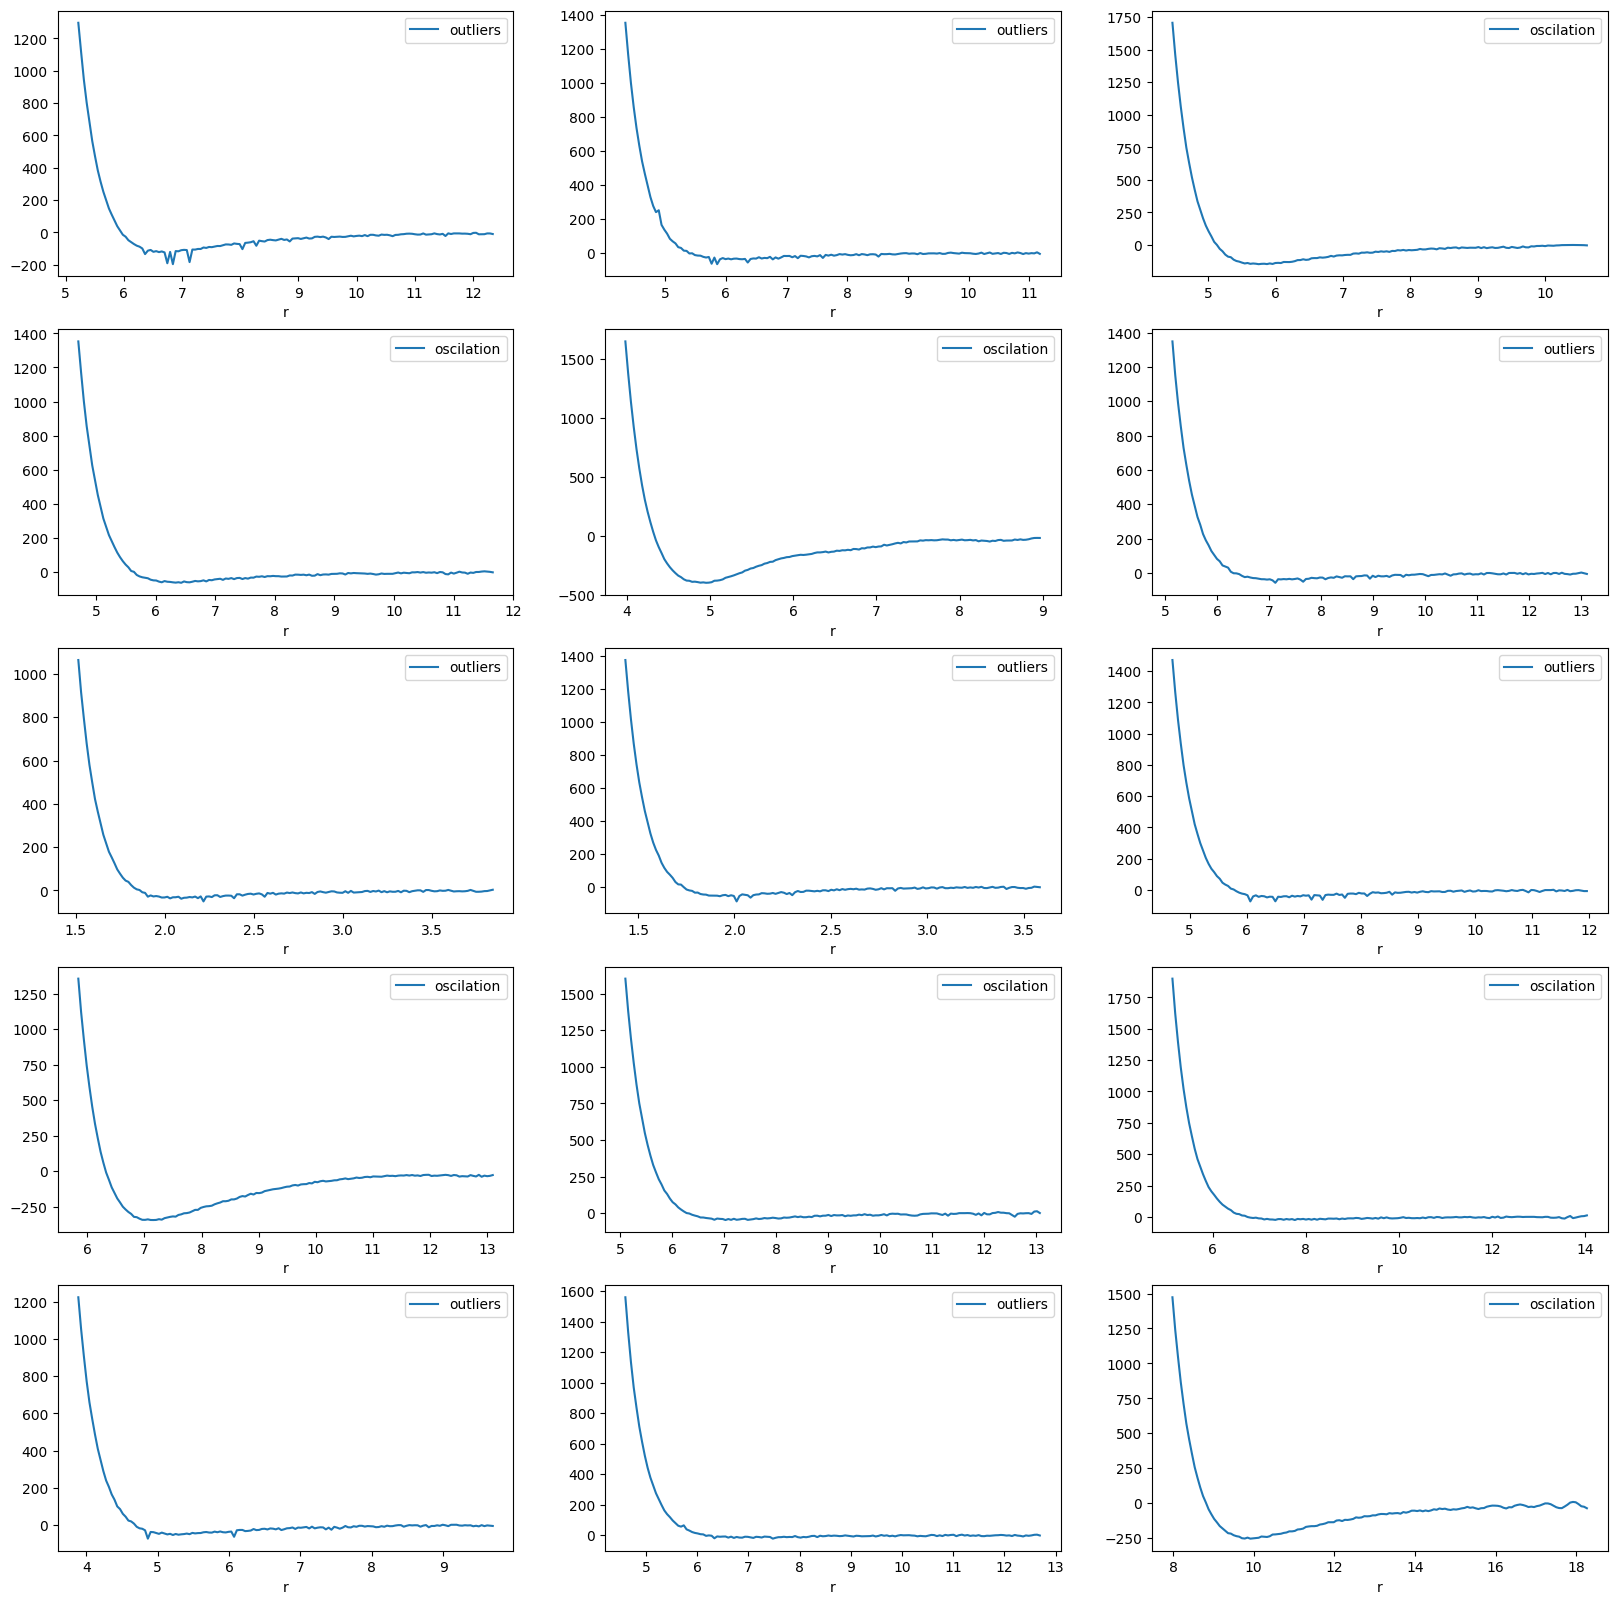

In [6]:
df_train = df_samples[df_samples.index < n_samples - int(n_samples * test_split)]
df_test = df_samples[df_samples.index >= n_samples - int(n_samples * test_split)]


get_model_failure_info(df_test, X_test, y_test, model)